# Experimentation: Data Pre-Processing
---

In [1]:
# Import libraries
import sys
sys.path.append("..")

from monai.config import print_config
from src.preprocessing import get_transforms, get_datasets, get_dataloaders

import torch
import matplotlib.pyplot as plt

print_config()

# Set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

MONAI version: 1.3.0
Numpy version: 1.26.4
Pytorch version: 2.2.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 865972f7a791bf7b42efbcd87c8402bd865b329e
MONAI __file__: c:\Users\<username>\AppData\Local\anaconda3\envs\torch-gpu\Lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: 5.3.0
Nibabel version: 5.2.1
scikit-image version: NOT INSTALLED or UNKNOWN VERSION.
scipy version: 1.12.0
Pillow version: 10.2.0
Tensorboard version: 2.16.2
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.17.1
tqdm version: 4.66.2
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.8
pandas version: 2.2.1
einops version: 0.7.0
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about ins

In [2]:
# Get transforms
transform = get_transforms(contrast_value=1000)

# Get datasets
train_ds, val_ds = get_datasets(root_dir="../data", collection="HCC-TACE-Seg", transform=transform, download= False, val_frac=0.2)

# Get dataloaders
train_loader, val_loader = get_dataloaders(train_ds, val_ds, batch_size=1)

# Check length of datasets and dataloaders
print(train_ds.get_indices(), val_ds.get_indices())
print(len(train_loader), len(val_loader))

[0 1 3 4] [2]
4 1


In [3]:
# Sample a batch of data from the dataloader
batch = next(iter(train_loader))

# Separate the image and segmentation from the batch
image, seg = batch["image"], batch["seg"]

print(image.shape, seg.shape)

Data statistics:
Type: <class 'monai.data.meta_tensor.MetaTensor'> torch.float32
Shape: torch.Size([1, 512, 512, 96])
Value range: (-2048.0, 1998.0)
Data statistics:
Type: <class 'torch.Tensor'> torch.int32
Shape: torch.Size([1, 512, 512, 96])
Value range: (0, 4)
torch.Size([1, 1, 512, 512, 96]) torch.Size([1, 1, 512, 512, 96])


torch.Size([512, 512]) torch.Size([512, 512])


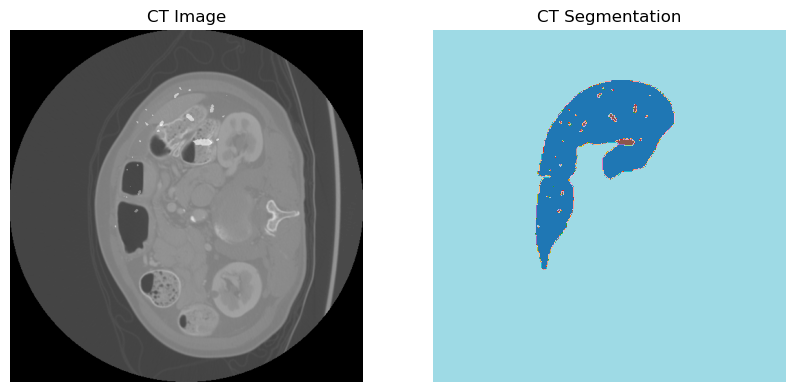

In [7]:
slice_idx = 60

# Sample a slice from the image
CT_slice = image[0, 0, :, :, slice_idx].cpu()

# Get the maximum segmentation class for each pixel in the slice
CT_seg_slice = seg[0, 0, :, :, slice_idx].cpu()

print(CT_slice.shape, CT_seg_slice.shape)

# Plot the image and segmentation slice as a subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(CT_slice, cmap="gray")
ax[0].set_title("CT Image")
ax[0].axis("off")
ax[1].imshow(CT_seg_slice, cmap="tab20")
ax[1].set_title("CT Segmentation")
ax[1].axis("off")
plt.show()


<class 'numpy.ndarray'> (512, 512, 49)
<class 'numpy.ndarray'> (512, 512, 49)


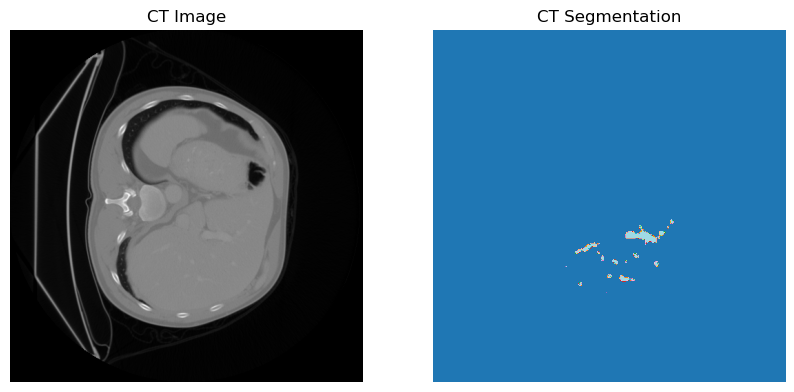

[0. 1. 2.]


In [12]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load the image and segmentation
image_path = (
    "../data/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_001.nii.gz"
)

label_path = (
    "../data/Task08_HepaticVessel/Task08_HepaticVessel/labelsTr/hepaticvessel_001.nii.gz"
)

# Load the image
image_nii = nib.load(image_path)
image_data = image_nii.get_fdata()

# Load the segmentation
label_nii = nib.load(label_path)
label_data = label_nii.get_fdata()

# Print the shape of the image and segmentation
print(type(image_data), image_data.shape)
print(type(label_data), label_data.shape)

# Sample a slice from the image and segmentation
slice_idx = 30
CT_slice = image_data[:, :, slice_idx]
CT_seg_slice = label_data[:, :, slice_idx]

# Plot the image and segmentation slice as a subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(CT_slice, cmap="gray")
ax[0].set_title("CT Image")
ax[0].axis("off")
ax[1].imshow(CT_seg_slice, cmap="tab20")
ax[1].set_title("CT Segmentation")
ax[1].axis("off")
plt.show()

print(np.unique(label_data))